In [1]:
import sys
from IPython import display
import time

sys.path.append('../algviz')
import svg_graph
import graph

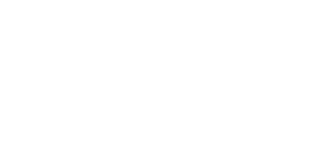

In [2]:
# 测试拓扑图的基本显示。
nodes_str = '[[0,1], [1,2], [2,3], [3,4], [4,5], [5,6], [6,7], [7,8]]'
edges_str = '[[0,3], [3,5], [5,4], [4,1], [1,0], [2,0], [5,2], [4,6]]'
graph_nodes = graph.parseGraph(nodes_str, edges_str)
gra = svg_graph.SvgGraph(list(graph_nodes.values()), True, 3.0, horizontal=True)
display.display(gra)

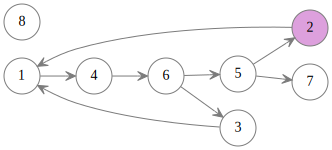

In [ ]:
# 测试跟踪器的遍历。
tr1 = graph.GraphTrace(graph_nodes[1], gra, (221, 160, 221), False)
gra._trace_info[(221, 160, 221)] = None
display.display(gra, display_id='d0')
time.sleep(1.0)
node_stack = [graph_nodes[0]]
visited = set()
while len(node_stack) > 0:
    cur_node = node_stack.pop()
    if cur_node in visited:
        continue
    visited.add(cur_node)
    tr1(cur_node)
    display.update_display(gra, display_id='d0')
    time.sleep(1.0)
    for i in range(len(tr1)):
        node_stack.append(tr1[i])

In [ ]:
# 测试添加和删除节点动画效果。
tr1[0] = None
display.display(gra, display_id='d1')
time.sleep(3.0)
tr1[3] = graph.GraphNode(15)
display.update_display(gra, display_id='d1')
time.sleep(3.0)
tr1[0] = graph_nodes[6]
display.update_display(gra, display_id='d1')
time.sleep(3.0)
gra.remove(graph_nodes[7])
display.update_display(gra, display_id='d1')
time.sleep(3.0)